In [115]:
import tensorflow as tf
import keras as keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *

import pandas as pd
import cv2

from matplotlib import pyplot as plt

import sklearn

In [131]:
train_df = pd.read_csv("../../data/actor_age/train/train.csv")

In [132]:
train_df.dtypes

ID       object
Class    object
dtype: object

In [133]:
# train_df = train_df.iloc[:10000]
train_df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [134]:
img_width = 32
img_height = 32
def get_img(img_id):
    # Load as grayscale
    img = cv2.imread('../../data/actor_age/train/Train/' + img_id, cv2.IMREAD_COLOR)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

print(train_df['ID'][0])
img = get_img(train_df['ID'][0])
img.shape

377.jpg


(32, 32, 3)

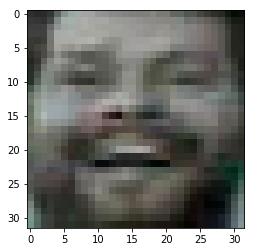

In [135]:
%matplotlib inline
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow('image',img_arr)
plt.imshow(img)

In [136]:
def generate_input(df):
    X = []
    df['ID'].apply(lambda a: X.append(get_img(a)))
    return X

train_X = np.array(generate_input(train_df))
print(train_X.shape)
# train_X.size

(19906, 32, 32, 3)


In [137]:
from sklearn.preprocessing import OneHotEncoder
dict = { 'YOUNG' : 0, 'MIDDLE': 1, 'OLD': 3 }
train_Y = []
train_df['Class'].apply(lambda a: train_Y.append(dict[a]))
train_Y = np.array(train_Y)
# print(train_Y)
# print(tf.one_hot(train_Y, 3))
np.array(tf.one_hot(train_Y, 3))
# print(pd.get_dummies(train_df['Class']))
one_hot_Encoder = OneHotEncoder(sparse=False)
train_Y = np.array(one_hot_Encoder.fit_transform(train_Y.reshape((-1, 1))))
# print(train_Y)
train_Y.shape

(19906, 3)

In [181]:
nb_filters1 = 32
conv1_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), padding="same", input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size)))

In [182]:
nb_filter2 = 64
conv2_size = 3

model.add(BatchNormalization(input_shape=(3,32,32)))

model.add(Conv2D(nb_filter2, (conv2_size, conv2_size), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

nb_filter3 = 32
conv3_size = 3

model.add(Conv2D(nb_filter3, (conv3_size, conv3_size), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filter3, (conv3_size, conv3_size), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

In [183]:
num_classes = 3

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [184]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_50 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)          0         
__________

In [185]:
opt = SGD(lr=0.01)
model.compile(optimizer=opt,
              loss='categorical_crossentropy', metrics=['accuracy'])
train_Y.shape

(19906, 3)

In [186]:
model.fit(x=train_X, y=train_Y, epochs=20)

Epoch 1/20
19906/19906 [==============================] - 103s 5ms/step - loss: 0.8618 - acc: 0.6088
Epoch 2/20
19906/19906 [==============================] - 115s 6ms/step - loss: 0.7469 - acc: 0.6724
Epoch 3/20
19906/19906 [==============================] - 122s 6ms/step - loss: 0.6978 - acc: 0.7008
Epoch 4/20
19906/19906 [==============================] - 103s 5ms/step - loss: 0.6642 - acc: 0.7178
Epoch 5/20
19906/19906 [==============================] - 96s 5ms/step - loss: 0.6359 - acc: 0.7336
Epoch 6/20
19906/19906 [==============================] - 95s 5ms/step - loss: 0.6092 - acc: 0.7451
Epoch 7/20
19906/19906 [==============================] - 128s 6ms/step - loss: 0.5909 - acc: 0.7507
Epoch 8/20
19906/19906 [==============================] - 106s 5ms/step - loss: 0.5667 - acc: 0.7667
Epoch 9/20
19906/19906 [==============================] - 98s 5ms/step - loss: 0.5462 - acc: 0.7717
Epoch 10/20
19906/19906 [==============================] - 87s 4ms/step - loss: 0.5214 - acc: 

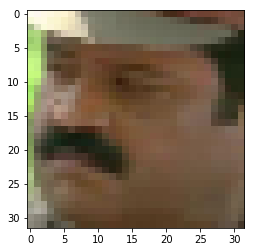

In [187]:
img = cv2.cvtColor(train_X[7000], cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [191]:
prediction = model.predict(train_X[7000:7001])
prediction = prediction.argmax(axis=1)
prediction

array([1])

In [192]:
train_Y[7000:7001].argmax(axis=1)

array([1])

In [ ]:
model.evaluate(train_X[:19000], train_Y[:19000])

 3296/19000 [====>.........................] - ETA: 20s